# EDA

In [9]:
import numpy as np 
import pandas as pd
import torch
import os
from PIL import Image
import matplotlib.pyplot as plt
#from pathlib import Path
import torchvision
from os.path import dirname, abspath
from torchvision import transforms

In [6]:
#Get paths 
train_corr = "/datasets/MaskedFace-Net/train/covered"
train_incorr = "/datasets/MaskedFace-Net/train/incorrect"
train_uncovered = "/datasets/MaskedFace-Net/train/uncovered"

#Holdout == Test set
holdout_corr = "/datasets/MaskedFace-Net/holdout/covered"
holdout_incorr = "/datasets/MaskedFace-Net/holdout/incorrect"
holdout_uncovered = "/datasets/MaskedFace-Net/holdout/uncovered"

val_corr = "/datasets/MaskedFace-Net/validation/covered"
val_incorr = "/datasets/MaskedFace-Net/validation/incorrect"
val_uncovered = "/datasets/MaskedFace-Net/validation/uncovered"

In [7]:
#Define transformation for train and validation dataset
transform_train = transforms.Compose(
    [transforms.RandomRotation(20),
     transforms.RandomHorizontalFlip(0.5),
     transforms.CenterCrop(500),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_val = transforms.Compose(
    [transforms.CenterCrop(500),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [14]:
#load trian, val, and test images from data folder
maskedface_net_train = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/train", transform=transform_train)
maskedface_net_val = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/validation", transform=transform_val)
maskedface_net_test = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/holdout", transform=transform_val)


#maskedface_net_train_corr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/train/covered", transform=transform_train)
#maskedface_net_val_corr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/validation/covereed", transform=transform_val)
#maskedface_net_test_corr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/holdout/covered", transform=transform_val)
#maskedface_net_train_incorr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/train/incorrect", transform=transform_train)
#maskedface_net_val_incorr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/validation/incorrect", transform=transform_val)
#maskedface_net_test_incorr = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/holdout/incorrect", transform=transform_val)

#maskedface_net_train_uncovered = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/train/uncovered", transform=transform_train)
#maskedface_net_val_uncovered = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/validation/uncovered", transform=transform_val)
#maskedface_net_test_uncovered = torchvision.datasets.ImageFolder("/datasets/MaskedFace-Net/holdout/uncovered", transform=transform_val)


In [29]:
len(maskedface_net_train)

37500

In [26]:
data_loader_train = torch.utils.data.DataLoader(maskedface_net_train,
                                          batch_size=32,
                                          shuffle=True)

data_loader_val = torch.utils.data.DataLoader(maskedface_net_val,
                                             batch_size=32,
                                             shuffle=True)

data_loader_test = torch.utils.data.DataLoader(maskedface_net_test,
                                             batch_size=32,
                                             shuffle=True)

In [27]:
data_iter = iter(data_loader_train).next()
img, label = data_iter

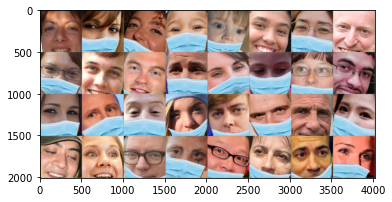

In [28]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(img))

In [49]:
train_corr_imgs = os.listdir(train_corr)
train_incorr_imgs = os.listdir(train_incorr)
train_uncovered_imgs = os.listdir(train_uncovered)

val_corr_imgs = os.listdir(val_corr)
val_incorr_imgs = os.listdir(val_incorr)
val_uncovered_imgs = os.listdir(val_uncovered)

test_corr_imgs = os.listdir(holdout_corr)
test_incorr_imgs = os.listdir(holdout_incorr)
test_uncovered_imgs = os.listdir(holdout_uncovered)

In [41]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

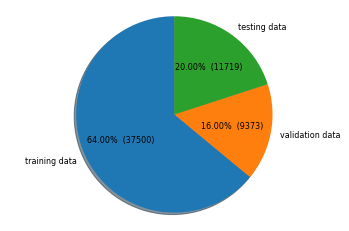

<Figure size 1440x720 with 0 Axes>

In [50]:
# Plot a pie chart of data size
labels = 'training data', 'validation data', 'testing data'
sizes = [len(maskedface_net_train), len(maskedface_net_val), len(maskedface_net_test)]
#explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

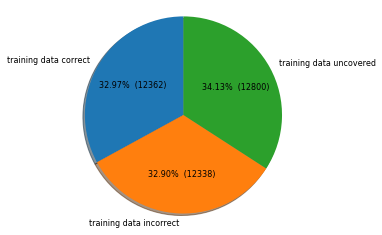

<Figure size 1440x720 with 0 Axes>

In [52]:
# Plot a pie chart of training data size
labels = 'training data correct', 'training data incorrect', 'training data uncovered'
sizes = [len(train_corr_imgs), len(train_incorr_imgs), len(train_uncovered_imgs)]
#explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

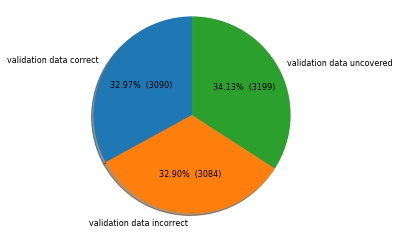

<Figure size 1440x720 with 0 Axes>

In [53]:
# Plot a pie chart of validation data size
labels = 'validation data correct', 'validation data incorrect', 'validation data uncovered'
sizes = [len(val_corr_imgs), len(val_incorr_imgs), len(val_uncovered_imgs)]
#explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

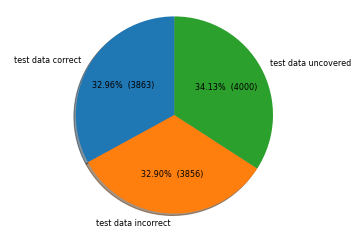

<Figure size 1440x720 with 0 Axes>

In [54]:
# Plot a pie chart of testing data size
labels = 'test data correct', 'test data incorrect', 'test data uncovered'
sizes = [len(test_corr_imgs), len(test_incorr_imgs), len(test_uncovered_imgs)]
#explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
train_dim = np.array([len(train_corr_imgs), len(train_incorr_imgs), len(train_uncovered_imgs)])
pd.DataFrame(train_dim, columns = ['Size'], index = ['Train Mask Correct', 'Train Mask Incorrect', 'Train Mask Uncovered']).to_csv('../results/data_dim.csv')

In [56]:
%%time
width = []
height = []

for i in train_corr_imgs:
    img = Image.open(train_corr + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])
    
for i in train_incorr_imgs:
    img = Image.open(train_incorr + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])
    
for i in train_uncovered_imgs:
    img = Image.open(train_uncovered + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])

CPU times: user 9.38 s, sys: 13.3 s, total: 22.7 s
Wall time: 1min 26s


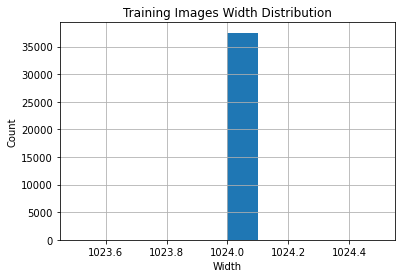

In [57]:
pd.Series(width).hist()
plt.title('Training Images Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')
plt.savefig('../results/TrainingWidth.jpg')

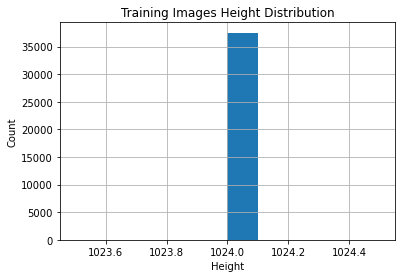

In [58]:
pd.Series(height).hist()
plt.title('Training Images Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.savefig('../results/TrainingHeight.jpg')

In [63]:
img = Image.open(train_corr + '/' + train_corr_imgs[0])
img.save('../results/sample1.jpg')
img = Image.open(train_incorr + '/' + train_incorr_imgs[0])
img.save('../results/sample2.jpg')
img = Image.open(train_uncovered + '/' + train_uncovered_imgs[0])
img.save('../results/sample3.jpg')